# Retail sale
https://www.kaggle.com/datasets/manjeetsingh/retaildataset?resource=download

## Feature

* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA

* Dept - the department number

## The Task
1.Predict the department-wide sales for each store for the following year

2.Model the effects of markdowns on holiday weeks

3.Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

# Analysis

## explore

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
feature = pd.read_csv('./data/Features data set.csv')
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [18]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [23]:
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
sales = pd.read_csv('./data/sales data-set.csv')
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [24]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [25]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
stores = pd.read_csv('./data/stores data-set.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## merge

In [14]:
# merge1
# 데이터 많은쪽 기준으로 데이터 적은 쪽 merge

df_merge = sales.merge(feature,on=['Store','Date','IsHoliday'])
df_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [13]:
# merge2

df = df_merge.merge(stores, on=['Store'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


## preprocessing

In [76]:
# 날짜
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [34]:
# IsHoliday encoding
df['IsHoliday'] = pd.factorize(df['IsHoliday'])[0]

In [77]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,year
0,1,1,2010-05-02,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-05-02,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-05-02,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-05-02,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-05-02,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10,2012
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10,2012
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10,2012
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10,2012


## pivot_table

### Type

In [44]:
# 데이터간 관계 확인

col = 'Type'
res_type = pd.pivot_table(df, values='Weekly_Sales', columns=[f'{col}'], index=['Date','Store','Dept'],
                       aggfunc=np.mean)

In [45]:
res_type

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
...                         ...       ...  ..
2012-12-10 45    93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [46]:
res_type.describe()

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


### IsHoliday

In [47]:
col = 'IsHoliday'
res_hol = pd.pivot_table(df, values='Weekly_Sales', columns=[f'{col}'], index=['Date','Store','Dept'],
                       aggfunc=np.mean)

In [48]:
res_hol

IsHoliday                     0   1
Date       Store Dept              
2010-01-10 1     1     20094.19 NaN
                 2     45829.02 NaN
                 3      9775.17 NaN
                 4     34912.45 NaN
                 5     23381.38 NaN
...                         ...  ..
2012-12-10 45    93     2644.24 NaN
                 94     4041.28 NaN
                 95    49334.77 NaN
                 97     6463.32 NaN
                 98     1061.02 NaN

[421570 rows x 2 columns]

In [49]:
res_hol.describe()

IsHoliday,0,1
count,391909.000000,29661.000000
mean,15901.445069,17035.823187
std,22330.747450,27222.000409
min,-4988.940000,-798.000000
25%,2079.750000,2078.540000
50%,7589.950000,7947.740000
75%,20131.210000,21189.250000
max,406988.630000,693099.360000


In [54]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [61]:
# Markdown
# task : 2.Model the effects of markdowns on holiday weeks

col = 'IsHoliday'
values = [c for c in df.columns if 'MarkDown' in c]
values

['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

In [63]:
res_md = pd.pivot_table(df, values=values, columns= [col], index=['Date','Store','Dept'],
                       aggfunc={values[0]:np.mean, values[1]:np.mean, values[2]:np.mean, values[3]:np.mean, values[4]:np.mean})

In [64]:
# Markdown2, Markdown3 는 holiday에 영향을 받은 것으로 보임

res_md.describe()

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      138739.000000  11942.000000  100526.000000   10722.000000   
mean         7332.984933   6240.733956    2298.528959   13048.763547   
std          8436.950798   6271.189481    5548.867501   23205.433537   
min             0.270000      2.800000    -265.760000      -9.980000   
25%          2344.650000    531.090000      40.480000      47.960000   
50%          5369.610000   5140.440000     180.020000    1447.260000   
75%          9173.970000  10155.750000    1407.400000   11778.680000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      125635.000000   11456.000000  123997.000000  10970.000000   
mean          195.831724   15077.548736    3384.219730   3371.283148   
std          1102.189294   29865.571239    6385.681355   5121.189881   
min           -29.100000       0.450000       0.220000      3.000000   
25%             4.590000      39.660000     536.080000    106.240000   
50%            21.380000     118.160000    1523.110000   1009.780000   
75%            92.360000     326.680000    3572.950000   4361.360000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      139441.000000  11991.000000  
mean         4722.908034   3536.647067  
std          6155.436006   2669.602227  
min           153.040000    135.160000  
25%          1904.050000   1508.560000  
50%          3402.660000   2737.170000  
75%          5588.470000   5266.900000  
max        108519.280000  11100.550000

# Visualization

## heatmap

In [78]:
corr_matrix = df.corr()

<AxesSubplot:>

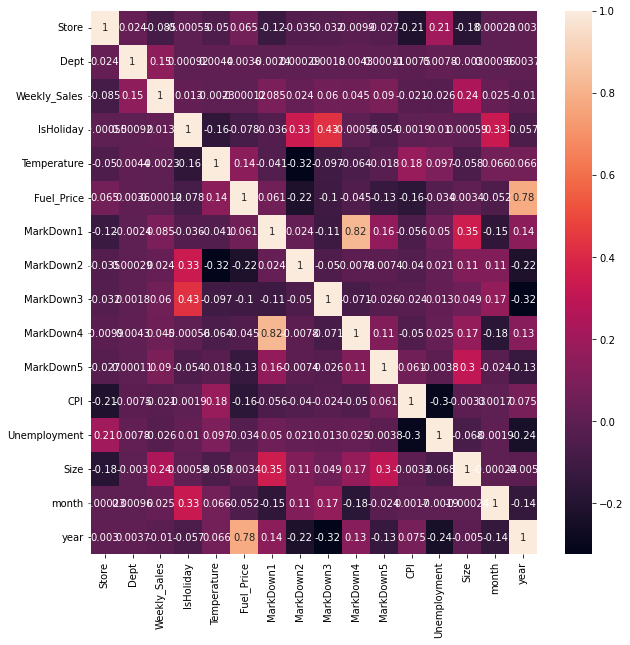

In [79]:
plt.figure(figsize= (10,10) )
sns.heatmap(corr_matrix, annot= True) 

## histogram

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'IsHoliday'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'MarkDown1'}>],
       [<AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>,
        <AxesSubplot:title={'center':'MarkDown5'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

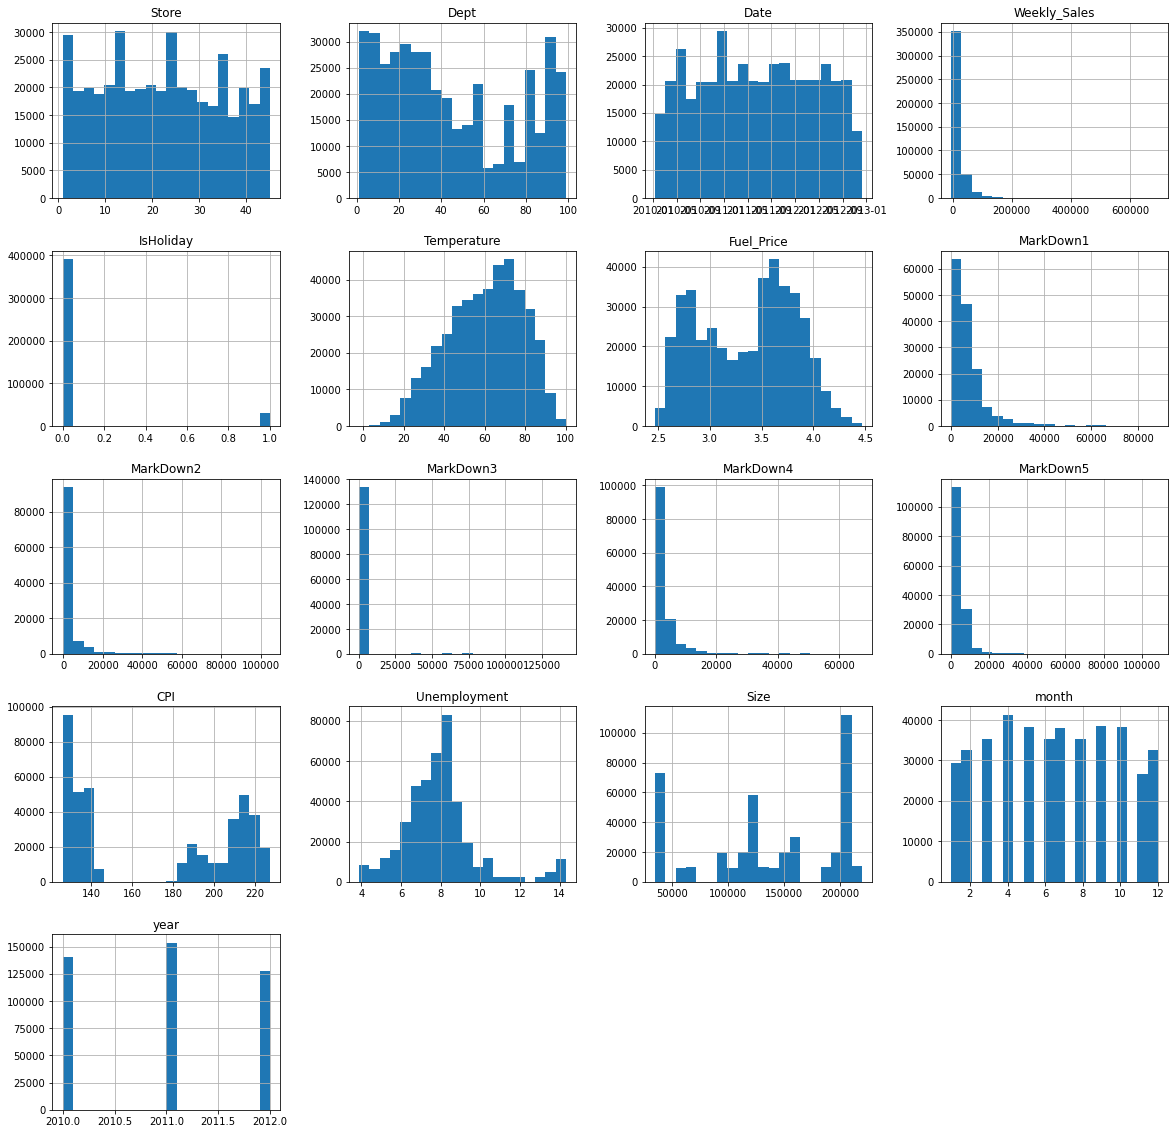

In [80]:
df.hist(figsize=(20,20), bins=20)

## pariplot

In [81]:
# col = ['Weekly_Sales','MarkDown1','Markdown2']
# sns.pairplot(df[col])

## Type

In [82]:
df_type = df.groupby('Type').mean()
df_type

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month,year
Type,,,,,,,,,,,,,,,,
A,21.736419,44.622156,20099.568043,0.070471,60.531945,3.343999,8686.890200,3763.754760,1647.306427,3916.010821,5999.613028,174.408895,7.791595,182231.285486,6.480030,2010.966683
B,18.450417,43.112273,12237.075977,0.070412,57.562951,3.382523,7108.807166,3063.889903,1483.702329,2925.556313,3688.560768,167.176656,7.928836,101818.735827,6.478100,2010.967858
C,38.942015,46.836350,9519.532538,0.069582,67.554266,3.364654,394.645495,447.069931,18.003074,65.044490,1384.304338,170.429314,8.934350,40535.725286,6.473085,2010.981055


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

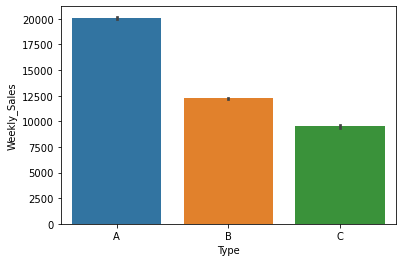

In [87]:
 sns.barplot(data= df, x=df['Type'], y=df['Weekly_Sales'])

## Dept

In [91]:
df_dept = df[['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Dept']].groupby('Dept').mean()
df_dept

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Dept,,,,,,
1,19213.485088,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240
2,43607.020113,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240
3,11793.698516,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240
4,25974.630238,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240
5,21365.583515,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240
...,...,...,...,...,...,...
95,69824.423080,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240
96,15210.942761,6287.967527,3119.796797,1193.855988,3212.808232,4383.115400
97,14255.576919,6938.862342,3260.710711,1354.717655,3361.671816,4451.886377


<AxesSubplot:ylabel='Dept'>

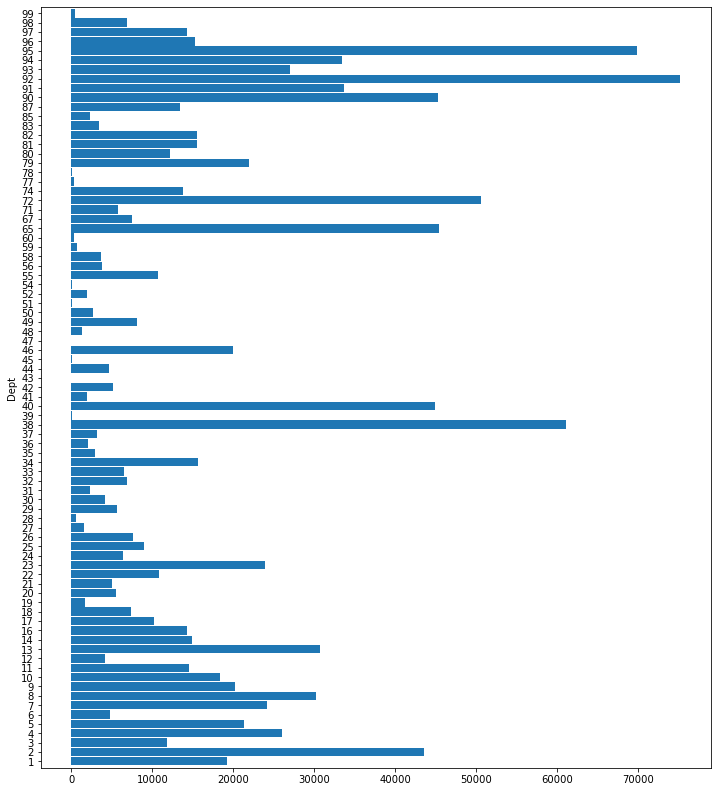

In [95]:
plt.figure(figsize=(12,14))
df_dept['Weekly_Sales'].plot(kind='barh',width= 0.9)

<AxesSubplot:ylabel='Dept'>

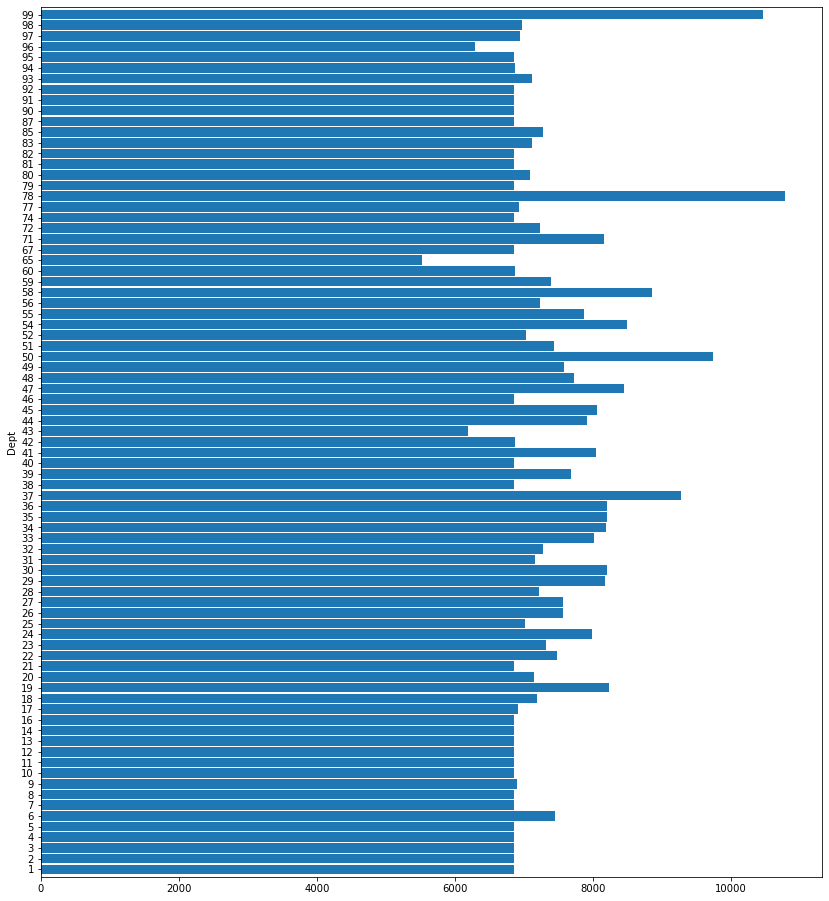

In [101]:
plt.figure(figsize=(14,16))
df_dept['MarkDown1'].plot(kind='barh',width= 0.9)

<AxesSubplot:ylabel='Dept'>

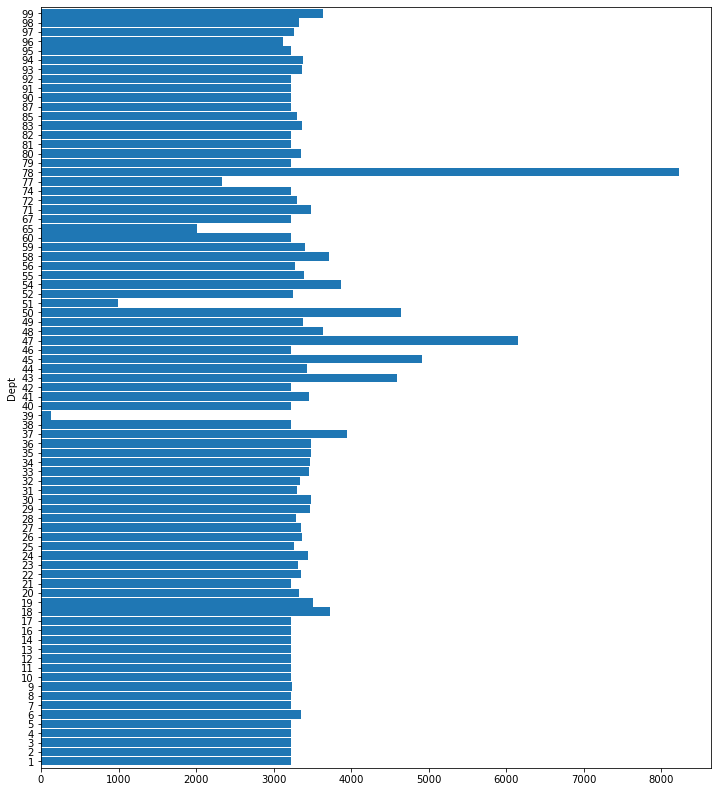

In [97]:
plt.figure(figsize=(12,14))
df_dept['MarkDown2'].plot(kind='barh',width= 0.9)

<AxesSubplot:ylabel='Dept'>

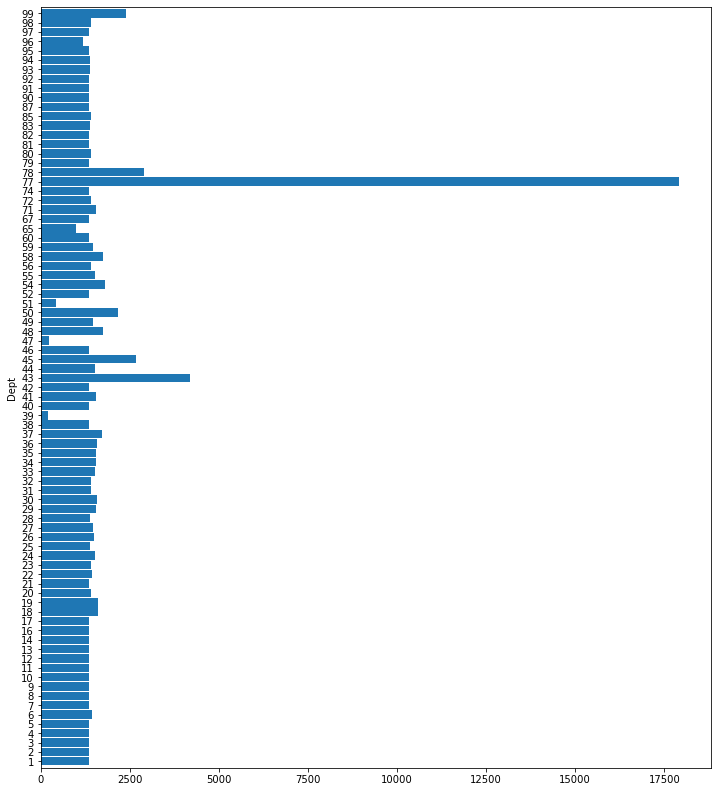

In [98]:
plt.figure(figsize=(12,14))
df_dept['MarkDown3'].plot(kind='barh',width= 0.9)

<AxesSubplot:ylabel='Dept'>

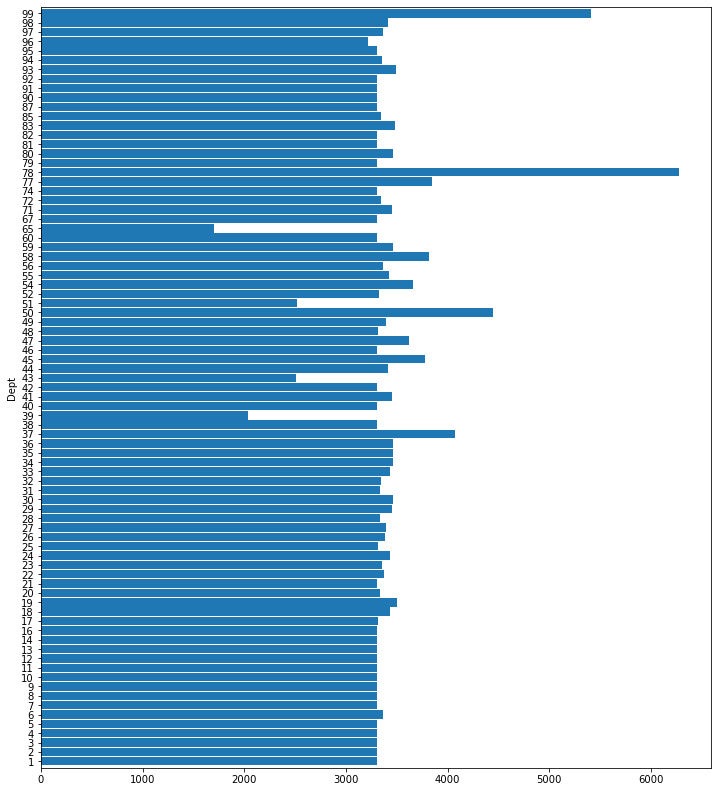

In [99]:
plt.figure(figsize=(12,14))
df_dept['MarkDown4'].plot(kind='barh',width= 0.9)

<AxesSubplot:ylabel='Dept'>

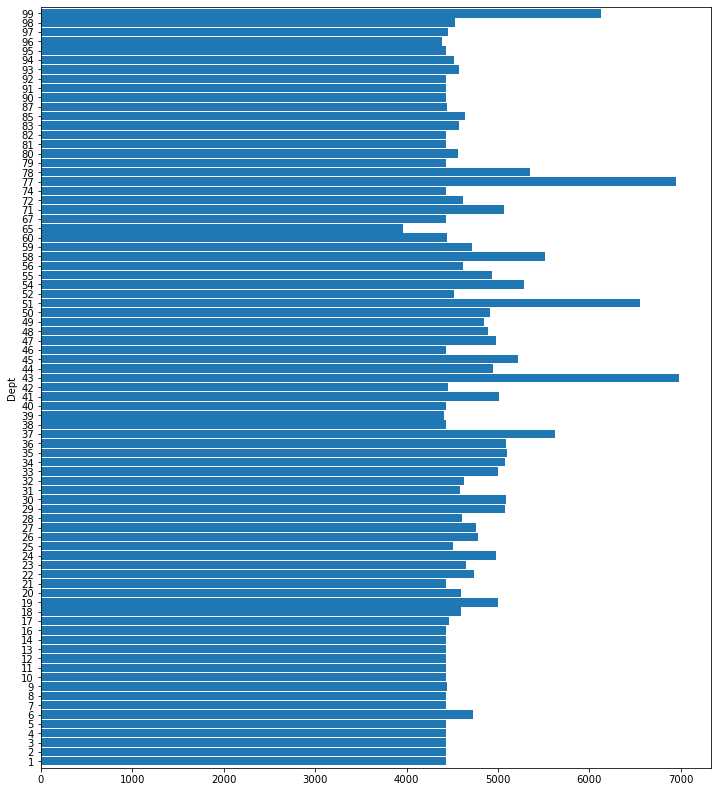

In [100]:
plt.figure(figsize=(12,14))
df_dept['MarkDown5'].plot(kind='barh',width= 0.9)

In [ ]:
# 99, 78, 77
# Sales 은 적고 Markdown 은 큰 수치를 보임